In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['font.family'] = 'tahoma'

In [46]:
train_df = pd.read_csv('v_t_eis_opanyw_detail_new.csv')
train_df_hosmap = pd.read_csv('v_l_hosmap.csv')
v_t_eis_opanyw_hosmap_join = pd.read_csv('v_t_eis_opanyw_hosmap_join.csv')

In [47]:
print('TRAIN SET MISSING VALUES:')
print(train_df.isna().sum())

TRAIN SET MISSING VALUES:
sex                   0
age                   0
status                0
projcode              0
status_cardb          0
sub_fund              0
cancel_payment        0
hcode                 0
htype                 0
htype_use             0
prov1                 0
zone_hcode            0
hmain2                0
prov2                 0
zone_hmain2           0
dateadm               0
date_send             0
pdx                   0
sdx1              93240
item_code             0
totl_amt              0
act_amt               0
pay_all               0
subinscl_af        8244
chkflag_af            0
dtype: int64


In [48]:
#Explore missing values
na_cols=train_df.columns[train_df.isna().any()].tolist()

mv=pd.DataFrame(train_df[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_df),2)
mv

,Number_missing,Percentage_missing
sdx1,93240,56.19
subinscl_af,8244,4.97


# HOSMAP

In [49]:
print('TRAIN SET MISSING VALUES:')
print(train_df_hosmap.isna().sum())

TRAIN SET MISSING VALUES:
hcode                       0
hname                       0
hlevel                      3
hclass                     60
drug_store               5304
clinic                   5994
clinic_lab               5951
private_hospital         5860
datein                     60
datein_fyear               60
dateout                  6001
htype                       0
htype_name                  0
subtype                     0
sub_type_name               0
sub_type_name_uhosnet       0
innovation_unit          5304
uhosnet                  5994
status_uc                   0
catm6                       0
province_id                 0
prov                        0
ampr                        0
tumbon                      0
nhso_zone                   0
nhso_zonename               0
latitude                 5697
longitude                5697
ingest_tm                   0
dtype: int64


In [50]:
#Explore missing values
hosmap=train_df_hosmap.columns[train_df_hosmap.isna().any()].tolist()
mv=pd.DataFrame(train_df_hosmap[hosmap].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing']=np.round(100*mv['Number_missing']/len(train_df_hosmap),2)
mv

,Number_missing,Percentage_missing
hlevel,3,0.05
hclass,60,1.00
drug_store,5304,88.39
clinic,5994,99.88
clinic_lab,5951,99.17
private_hospital,5860,97.65
datein,60,1.00
datein_fyear,60,1.00
dateout,6001,100.00
innovation_unit,5304,88.39


In [51]:
# Assuming 'train_df_hosmap' is your DataFrame
train_df_hosmap['drug_store'].fillna(0, inplace=True)  # Fill missing values with 0
drug_store = train_df_hosmap['drug_store'].value_counts()
print(drug_store)

drug_store
0.0    5304
1.0     697
Name: count, dtype: int64


In [52]:
train_df_hosmap['innovation_unit'].fillna('NULL', inplace=True)
innovation_unit	= train_df_hosmap['innovation_unit'].value_counts()
innovation_unit	

innovation_unit
NULL     5304
D1016       1
D0029       1
D0030       1
D0605       1
         ... 
D0859       1
D0058       1
D1507       1
D1554       1
D0608       1
Name: count, Length: 698, dtype: int64

In [53]:
train_df_hosmap['clinic'].fillna(0, inplace=True)  # Fill missing values with 0
clinic = train_df_hosmap['clinic'].value_counts()
print(clinic)

clinic
0.0    5994
1.0       7
Name: count, dtype: int64


In [54]:
train_df_hosmap['clinic_lab'].fillna(0, inplace=True)
clinic_lab = train_df_hosmap['clinic_lab'].value_counts()
print(clinic_lab)

clinic_lab
0.0    5951
1.0      50
Name: count, dtype: int64


In [55]:
train_df_hosmap['private_hospital'].fillna(0, inplace=True)
private_hospital = train_df_hosmap['private_hospital'].value_counts()
private_hospital

private_hospital
0.0    5860
1.0     141
Name: count, dtype: int64

In [56]:
#train_df_hosmap= train_df_hosmap.drop('dateout', axis=1)

In [57]:
train_df_hosmap['uhosnet'].fillna('NULL', inplace=True) #ช่องว่างให้เพิ่มเป็นคำว่า NULL แทน
uhosnet	= train_df_hosmap['uhosnet'].value_counts()
uhosnet	

uhosnet
NULL       5994
UHOSNET       7
Name: count, dtype: int64

In [58]:
train_df_hosmap['hlevel'].fillna('NULL', inplace=True) #ช่องว่างให้เพิ่มเป็นคำว่า NULL แทน
hlevel = train_df_hosmap['hlevel'].value_counts()
hlevel

hlevel
36.0    5769
37.0     140
38.0      53
39.0      23
35.0      13
NULL       3
Name: count, dtype: int64

In [59]:
# เช็ค hlevel missing value
filtered_hlevel = train_df_hosmap[train_df_hosmap['hlevel'] == 'NULL']

In [60]:
#แทนค่า เปลี่ยนแปลงค่าในตาราง
if train_df_hosmap.at[1744, 'hlevel'] == 'NULL':
    train_df_hosmap.at[1744, 'hlevel'] = 36.0

if train_df_hosmap.at[1322, 'hlevel'] == 'NULL':
    train_df_hosmap.at[1322, 'hlevel'] = 36.0

if train_df_hosmap.at[5473, 'hlevel'] == 'NULL':
    train_df_hosmap.at[5473, 'hlevel'] = 36.0

In [61]:
# Convert 'dateadm' column to string format
train_df_hosmap['catm6'] = train_df_hosmap['catm6'].astype(str)

# Extract year, month, and day from 'dateadm' column 20220720 // 103901
train_df_hosmap['จังหวัด'] = train_df_hosmap['catm6'].str[:2]
train_df_hosmap['เขต'] = train_df_hosmap['catm6'].str[2:4]
train_df_hosmap['แขวง'] = train_df_hosmap['catm6'].str[4:]

# Print the modified DataFrame
# print(train_df_hosmap[['จังหวัด', 'เขต', 'แขวง']])

In [62]:
# Convert 'dateadm' column to string format
train_df['dateadm'] = train_df['dateadm'].astype(str)

# Extract year, month, and day from 'dateadm' column
train_df['year'] = train_df['dateadm'].str[:4]
train_df['month'] = train_df['dateadm'].str[4:6]
train_df['day'] = train_df['dateadm'].str[6:]
train_df['yearmonth'] = train_df['dateadm'].str[:6]

# Print the modified DataFrame
# print(train_df[['year', 'month', 'day','yearmonth']])

In [63]:
conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N', 'x']))
)

# ดึงข้อมูลที่เข้าร่วมเงื่อนไข
filtered_data = train_df[conditions]

# นับจำนวนแถวตาม htype_use
htyperesult = filtered_data.groupby('htype_use').size().reset_index(name='เขต13')

htyperesult

,htype_use,เขต13
0,UHOSNET,102
1,คลินิก(เอกชน),22615
2,รพ.(เอกชน),7433
3,อื่นๆ,135775


In [64]:
sum = htyperesult['เขต13'].sum()
sum


165925

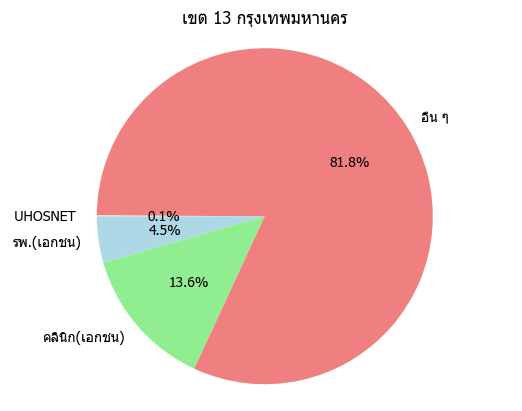

In [65]:
hprivite = 7433
cilnic = 22615
etc = 135775
uhosnet = 102
# สร้างข้อมูลและเลือกสี
labels = ['รพ.(เอกชน)', 'คลินิก(เอกชน)', 'อื่น ๆ ',' UHOSNET ']
sizes = [hprivite, cilnic, etc , uhosnet]
colors = ['lightblue', 'lightgreen', 'lightcoral' , 'lightyellow']

# พล็อตกราฟวงกลม
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

# เพิ่มรายละเอียดกราฟ
plt.title('เขต 13 กรุงเทพมหานคร')
plt.axis('equal')

# แสดงกราฟวงกลม
plt.show()

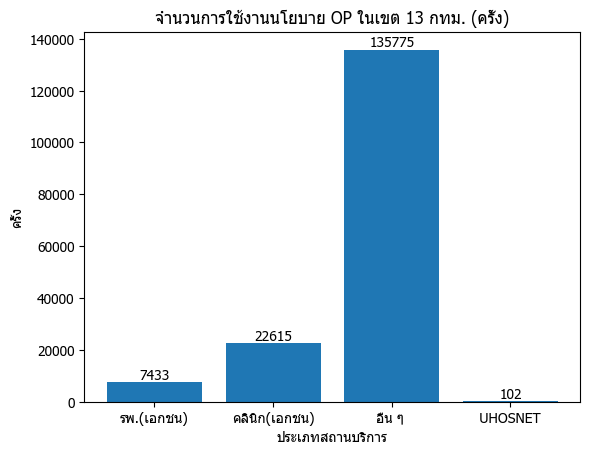

In [66]:
# ตัวแปรที่ใช้สร้างกราฟแท่ง
categories = ['รพ.(เอกชน)', 'คลินิก(เอกชน)', 'อื่น ๆ ',' UHOSNET ']
values = [hprivite, cilnic, etc, uhosnet]

# พล็อตกราฟแท่ง
plt.bar(categories, values)

# เพิ่มรายละเอียดกราฟ
plt.title('จำนวนการใช้งานนโยบาย OP ในเขต 13 กทม. (ครั้ง)')
plt.xlabel('ประเภทสถานบริการ')
plt.ylabel('ครั้ง')

for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')
    
# แสดงกราฟ
plt.show()


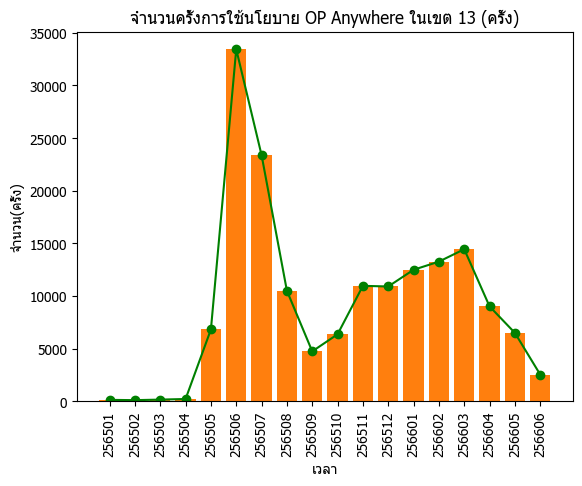

In [67]:
# ตั้งเงื่อนไขการกรองข้อมูล
conditions = (
    (train_df['zone_hcode'] == 13) &
    (train_df['status'] == 4) &
    (train_df['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
    (train_df['projcode'].isin(['WALKIN', 'R9OPFS'])) &
    (train_df['cancel_payment'].isin(['N','x']))
)

# ดึงข้อมูลที่เข้าร่วมเงื่อนไข
filtered_data = train_df[conditions]

# นับจำนวนแถวตาม yearmonth
zone_hcode_month_result = filtered_data.groupby('yearmonth').size().reset_index(name='เขต13')
zone_hcode_month_result = zone_hcode_month_result.sort_values('yearmonth')

df = zone_hcode_month_result 

# พล็อตกราฟแท่ง
plt.bar(range(len(df)), df['เขต13'], color='#ff7f0e')

# กำหนดแกน x
plt.xticks(range(len(df)), df['yearmonth'], rotation=90)

# พล็อตเส้น
plt.plot(range(len(df)), df['เขต13'], marker='o', color='Green')

# เพิ่มรายละเอียดกราฟ
plt.title("จำนวนครั้งการใช้นโยบาย OP Anywhere ในเขต 13 (ครั้ง)")
plt.xlabel("เวลา")
plt.ylabel("จำนวน(ครั้ง)")

# แสดงกราฟ
plt.show()


In [68]:
zone_hcode_month_result 

,yearmonth,เขต13
0,256501,129
1,256502,101
2,256503,154
3,256504,211
4,256505,6817
5,256506,33445
6,256507,23383
7,256508,10495
8,256509,4736
9,256510,6361


In [69]:
print('Train set shape:', train_df.shape)

Train set shape: (165925, 29)


จำนวนการใช้สิทธิ OP ในกรุงเทพมหานครทั้ง 50 เขต

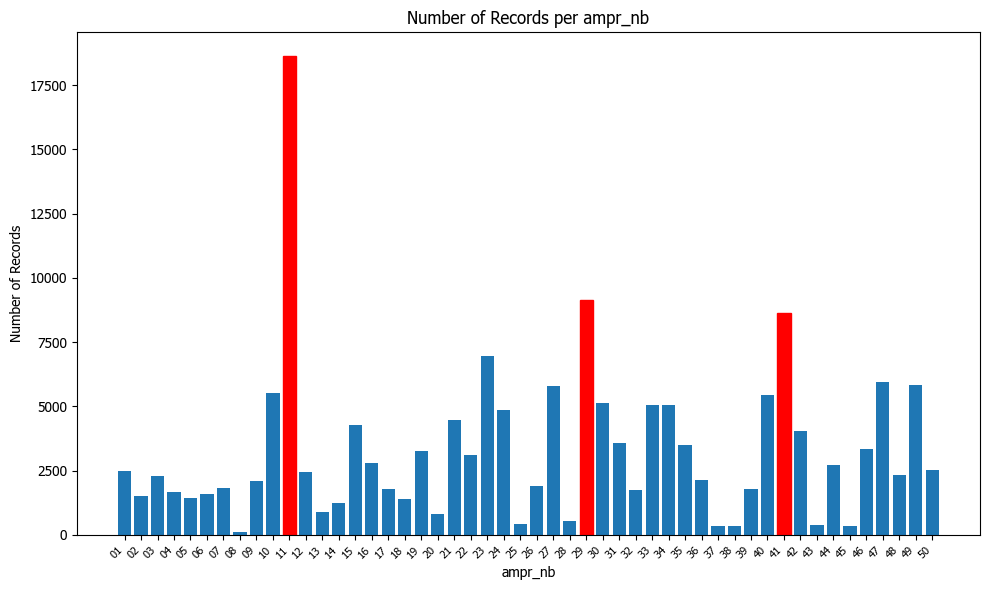

In [70]:
train_df['hcode'] = train_df['hcode'].astype(str)


# Assuming you already have the data from the tables `intern.v_t_eis_opanyw_detail` and `intern.v_l_hosmap` loaded into pandas DataFrames `eis` and `lh` respectively.

# Apply the initial filtering conditions to create the TAB1 DataFrame
TAB1 = train_df.merge(train_df_hosmap, on='hcode', how='inner')
TAB1 = TAB1[(TAB1['zone_hcode'] == 13) &
            (TAB1['status'] == 4) &
            (TAB1['sub_fund'].isin(['R9OPFS', 'WALKIN'])) &
            (TAB1['projcode'].isin(['WALKIN', 'R9OPFS'])) &
            (TAB1['cancel_payment'].isin(['N', 'x'])) &
            (TAB1['catm6'].str.startswith('10'))]

# Extract the required columns from TAB1 and create the hello DataFrame with additional calculated columns
hello = TAB1.copy()
hello['province_nb'] = hello['catm6'].str[:2]
hello['ampr_nb'] = hello['catm6'].str[2:4]
hello['tumbon_nb'] = hello['catm6'].str[4:6]
hello['year'] = hello['dateadm'].str[:4]
hello['month'] = hello['dateadm'].str[4:6]
hello['day'] = hello['dateadm'].str[6:8]

# Perform the final count operation on hello DataFrame
result = hello.groupby('ampr_nb').size().reset_index(name='number').sort_values('ampr_nb')

# Plot the graph
plt.figure(figsize=(10, 6))  # Set the figure size to adjust the plot
bars = plt.bar(result['ampr_nb'], result['number'])
plt.xlabel('ampr_nb')
plt.ylabel('Number of Records')
plt.title('Number of Records per ampr_nb')

# Highlight the top 3 bars with a different color
top_3_indices = result['number'].nlargest(3).index
for i in top_3_indices:
    bars[i].set_color('red')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=8)

plt.tight_layout()  # To add extra spacing between labels
plt.show()

อำเภอที่่มีการใช้ OP มากที่สุด

In [71]:
result = hello.groupby('ampr_nb').size().reset_index(name='number').sort_values('ampr_nb', ascending=False)
top_ten = result.sort_values('number', ascending=False).head(10)
top_ten

,ampr_nb,number
10,11,18624
28,29,9157
40,41,8629
22,23,6969
46,47,5945
48,49,5833
26,27,5781
9,10,5520
39,40,5433
29,30,5138


In [72]:
### สถานบริการในเขต 11
ampr11 = pd.read_csv('ampr11.csv')
filtered_hosmap = train_df_hosmap[train_df_hosmap['catm6'].str.startswith('1011')]
hosmap11 = filtered_hosmap[['hcode', 'hname', 'catm6', 'ampr', 'tumbon']]
ampr11

,hcode1,hosname,catm6,ampr_nb,tumbon_nb,ampr_nb_count
0,11538,รพ.ลาดกระบังกรุงเทพมหานคร,101101,11,1,433
1,24258,คลินิกเวชกรรมจุฬารัตน์ 8,101101,11,1,308
2,41371,รพ.พระจอมเกล้าเจ้าคุณทหาร,101101,11,1,13116
3,13689,ศูนย์บริการสาธารณสุข46 กันตารัติอุทิศ,101101,11,1,1363
4,21755,ศูนย์บริการสาธารณสุข45 ร่มเกล้า ลาดกระบัง,101101,11,1,3330
5,42794,คลินิกเวชกรรมใกล้บ้านใกล้ใจ 15,101103,11,3,74


In [73]:
### สถานบริการทั้งหมดในเขต 11
hosmap11

,hcode,hname,catm6,ampr,tumbon
231,22480,มณฑลคลินิกการแพทย์แผนไทย,101104,เขตลาดกระบัง,ลำปลาทิว
232,24551,สายไหมคลินิกเวชกรรม สาขาลาดกระบัง,101104,เขตลาดกระบัง,ลำปลาทิว
1270,21492,คลินิกวัด 1 เวชกรรม,101101,เขตลาดกระบัง,ลาดกระบัง
1271,20197,สหคลินิกสุขภาพใจ,101101,เขตลาดกระบัง,ลาดกระบัง
1272,24031,คลินิกทันตกรรมบ้านสีชมพู,101102,เขตลาดกระบัง,คลองสองต้นนุ่น
...,...,...,...,...,...
5844,D2195,วัตสันฟาร์มาซี สาขาโรบินสัน ลาดกระบัง,101101,เขตลาดกระบัง,ลาดกระบัง
5845,D1281,บู๊ทส์ - เดอะ พาซิโอ ลาดกระบัง,101101,เขตลาดกระบัง,ลาดกระบัง
5846,D2973,เอ็กซ์ต้า พลัส สาขาร่มเกล้า 27,101101,เขตลาดกระบัง,ลาดกระบัง
5847,D3192,เอ็กซ์ต้า พลัส สาขาลาดกระบัง 13/7,101101,เขตลาดกระบัง,ลาดกระบัง


In [74]:
total_hospitals = 104
usable_hospitals = 6
utilization_rate = (usable_hospitals / total_hospitals) * 100
print(f"เปอร์เซ็นต์ความใช้งาน: {utilization_rate:.2f}%")


เปอร์เซ็นต์ความใช้งาน: 5.77%


Text(0.5, 1.0, 'เปอร์เซ็นต์การใช้งานสถานบริการในเขต 11 ลาดกระบัง กรุงเทพ')

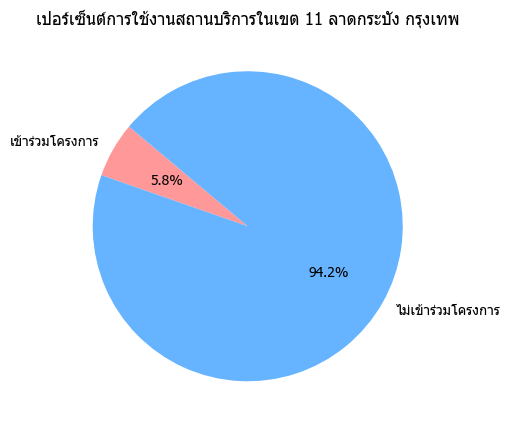

In [75]:
labels = ['เข้าร่วมโครงการ', 'ไม่เข้าร่วมโครงการ']
sizes = [utilization_rate, 100 - utilization_rate]
colors = ['#ff9999', '#66b3ff']
plt.figure(figsize=(5, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('เปอร์เซ็นต์การใช้งานสถานบริการในเขต 11 ลาดกระบัง กรุงเทพ')

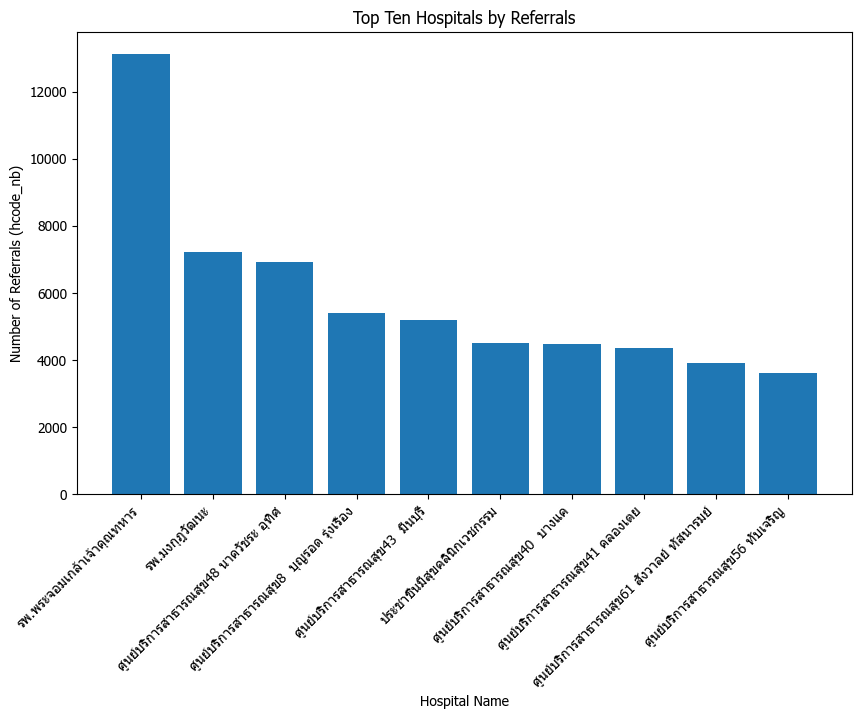

In [76]:

tab1 = train_df.loc[
    (train_df["zone_hcode"] == 13)
    & (train_df["status"] == 4)
    & (train_df["sub_fund"].isin(['R9OPFS', 'WALKIN']))
    & (train_df["projcode"].isin(['WALKIN', 'R9OPFS']))
    & (train_df["cancel_payment"].isin(['N', 'x']))
]
tab1 = tab1.merge(train_df_hosmap, left_on='hcode', right_on='hcode')
tab1 = tab1[['hcode', 'hname', 'catm6', 'ampr', 'tumbon']]

# Create additional columns as in the original query
tab1['ampr_nb'] = tab1['catm6'].str.slice(3, 5)
tab1['tumbon_nb'] = tab1['catm6'].str.slice(5, 7)

# Group and aggregate the data
result = tab1.groupby(['hcode', 'hname', 'catm6', 'ampr_nb', 'tumbon_nb']).size().reset_index(name='hcode_nb')
result = result.sort_values(by='hcode_nb', ascending=False)

# Select the top ten hospitals based on 'hcode_nb'
top_ten_hospitals = result.nlargest(10, 'hcode_nb')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_ten_hospitals['hname'], top_ten_hospitals['hcode_nb'])
plt.xlabel('Hospital Name')
plt.ylabel('Number of Referrals (hcode_nb)')
plt.title('Top Ten Hospitals by Referrals')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [77]:
print('แยกอำเภอ หาข้าม cup') 
print('หาข้ามจังหวัด')
print('หาข้ามเขต')

แยกอำเภอ หาข้าม cup
หาข้ามจังหวัด
หาข้ามเขต


## ข้ามเขต OP ANYWHERE 
zone_hcode <>  zone_hmain2

In [78]:
train_df_crosszone = pd.read_csv('CROSS_ZONE_13_NEW.csv')
sum = train_df_crosszone['number'].sum() 
sum

81078

In [79]:
train_df_crosszone

,ampr_nb,ampr,number
0,1,เขตพระนคร,695
1,2,เขตดุสิต,961
2,3,เขตหนองจอก,1178
3,4,เขตบางรัก,604
4,5,เขตบางเขน,1438
5,6,เขตบางกะปิ,952
6,7,เขตปทุมวัน,1058
7,8,เขตป้อมปราบศัตรูพ่าย,61
8,9,เขตพระโขนง,1216
9,10,เขตมีนบุรี,909


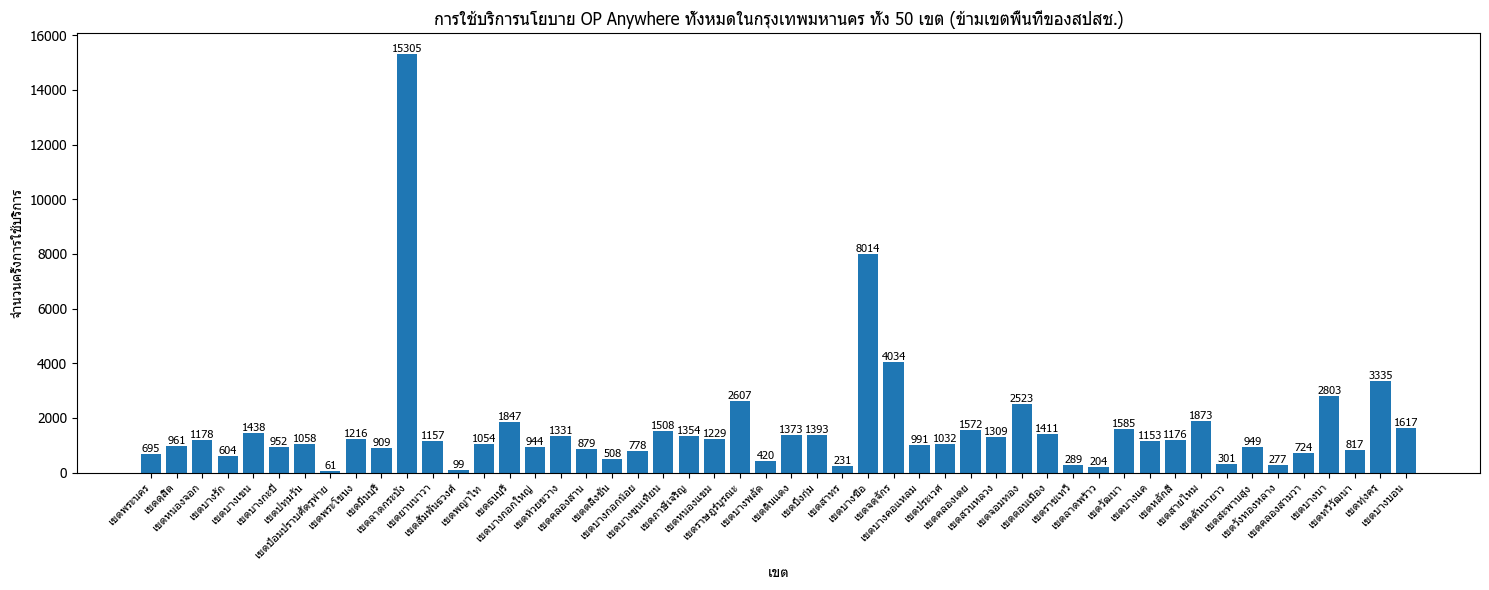

In [80]:
#ข้ามเขต สปสช
train_df_crosszone = pd.read_csv('CROSS_ZONE_13_NEW.csv')
train_df_crosszone['ampr'] = train_df_crosszone['ampr'].astype(str)
# Plot the bar graph
plt.figure(figsize=(15, 6))
plt.bar(train_df_crosszone['ampr'], train_df_crosszone['number'])
# เพิ่มข้อมูลตัวเลขบนแท่งกราฟ
for index, value in enumerate(train_df_crosszone['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)
plt.xlabel('เขต')
plt.ylabel('จำนวนครั้งการใช้บริการ')
plt.title('การใช้บริการนโยบาย OP Anywhere ทั้งหมดในกรุงเทพมหานคร ทั้ง 50 เขต (ข้ามเขตพื้นที่ของสปสช.)')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

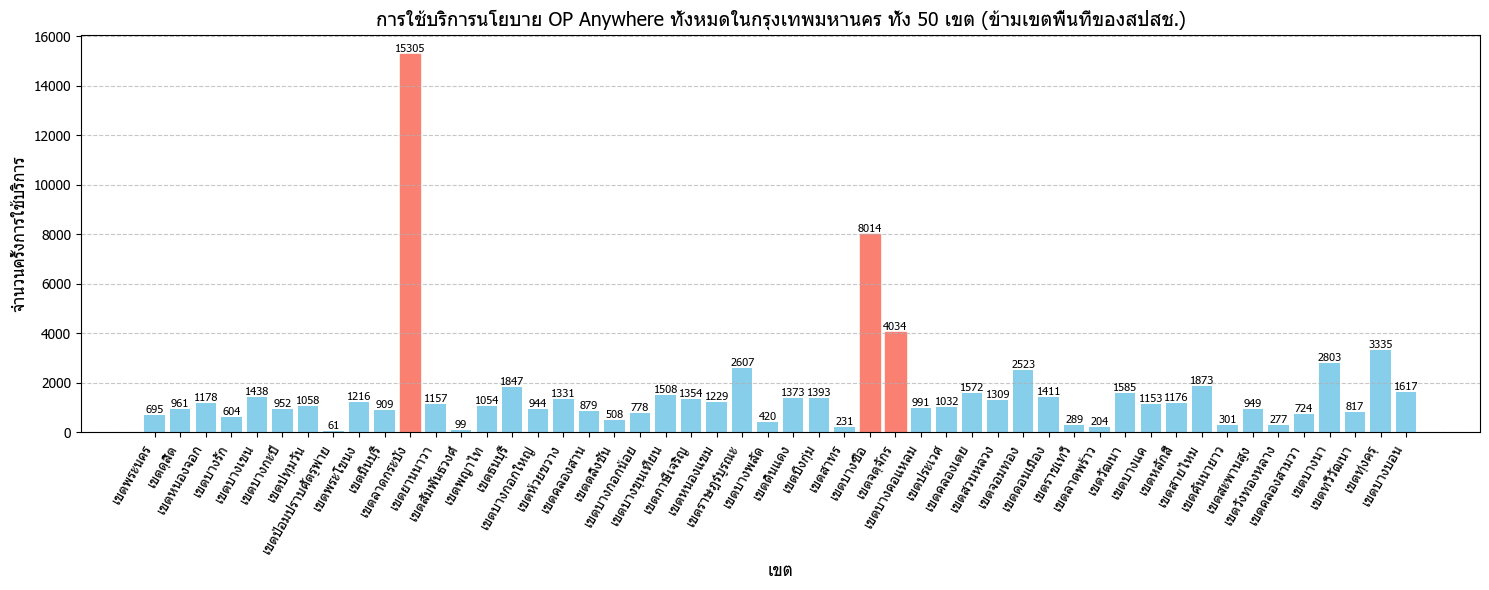

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))  # Set the figure size to adjust the plot
bars = plt.bar(train_df_crosszone['ampr'], train_df_crosszone['number'], color='skyblue')  # Use a pleasant color for the bars
# เพิ่มข้อมูลตัวเลขบนแท่งกราฟ
for index, value in enumerate(train_df_crosszone['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)
plt.xlabel('เขต', fontsize=12)  # Increase font size for the axis labels
plt.ylabel('จำนวนครั้งการใช้บริการ', fontsize=12)  # Increase font size for the axis labels
plt.title('การใช้บริการนโยบาย OP Anywhere ทั้งหมดในกรุงเทพมหานคร ทั้ง 50 เขต (ข้ามเขตพื้นที่ของสปสช.)', fontsize=14)  # Increase font size for the title

# Highlight the top 3 bars with a different color
top_3_indices = train_df_crosszone['number'].nlargest(3).index
for i in top_3_indices:
    bars[i].set_color('salmon')  # Use a different color for the top 3 bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=60, ha='right', fontsize=10)  # Increase font size for x-axis labels

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # To add extra spacing between labels
plt.show()

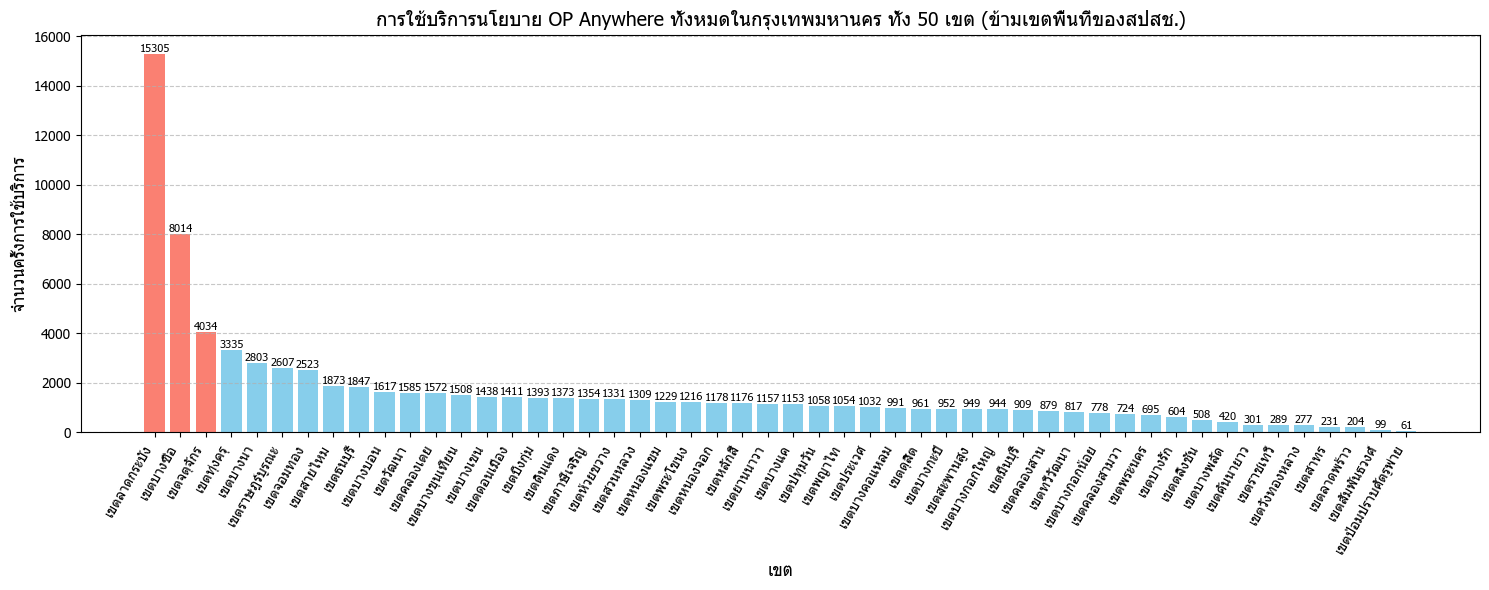

In [82]:
train_df_crosszone = train_df_crosszone.sort_values(by='number', ascending=False)

plt.figure(figsize=(15, 6))

# Plot the bar graph with orange color for the top three districts
bars = plt.bar(train_df_crosszone['ampr'], train_df_crosszone['number'], color=['salmon' if i < 3 else 'skyblue' for i in range(len(train_df_crosszone))])

# Add data labels on top of the bars
for index, value in enumerate(train_df_crosszone['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.xlabel('เขต', fontsize=12)
plt.ylabel('จำนวนครั้งการใช้บริการ', fontsize=12)
plt.title('การใช้บริการนโยบาย OP Anywhere ทั้งหมดในกรุงเทพมหานคร ทั้ง 50 เขต (ข้ามเขตพื้นที่ของสปสช.)', fontsize=14)

plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

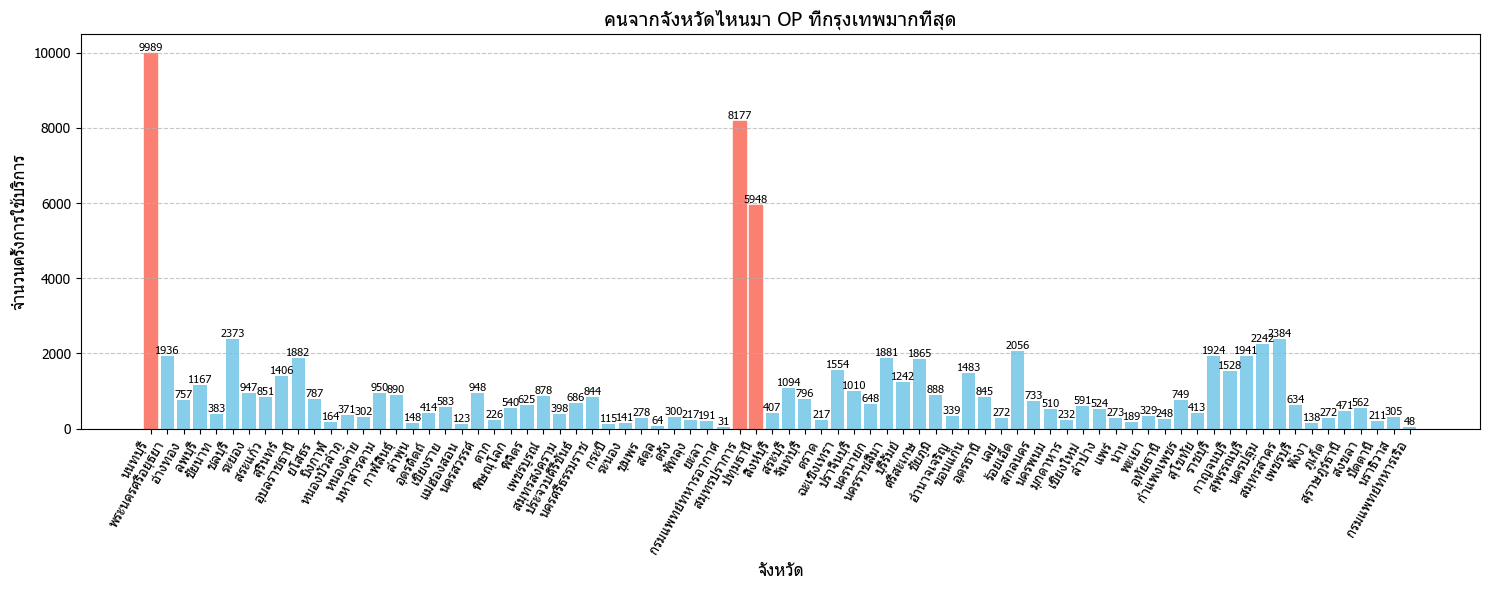

In [83]:
train_df_crosszone2 = pd.read_csv('CROSS_ZONE_13_NEW2.csv')

plt.figure(figsize=(15, 6))

# Plot the bar graph with default color
bars = plt.bar(train_df_crosszone2['province_name'], train_df_crosszone2['number'],color='skyblue')

# Add data labels on top of the bars
for index, value in enumerate(train_df_crosszone2['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.xlabel('จังหวัด', fontsize=12)
plt.ylabel('จำนวนครั้งการใช้บริการ', fontsize=12)
plt.title('คนจากจังหวัดไหนมา OP ที่กรุงเทพมากที่สุด', fontsize=14)

# Find the indices of the top 3 values in 'number' column
top_3_indices = train_df_crosszone2['number'].nlargest(3).index

# Highlight the top 3 bars with a different color
for i in top_3_indices:
    bars[i].set_color('salmon')  # Use a different color for the top 3 bars

plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


เรียงจาก มาก - น้อย

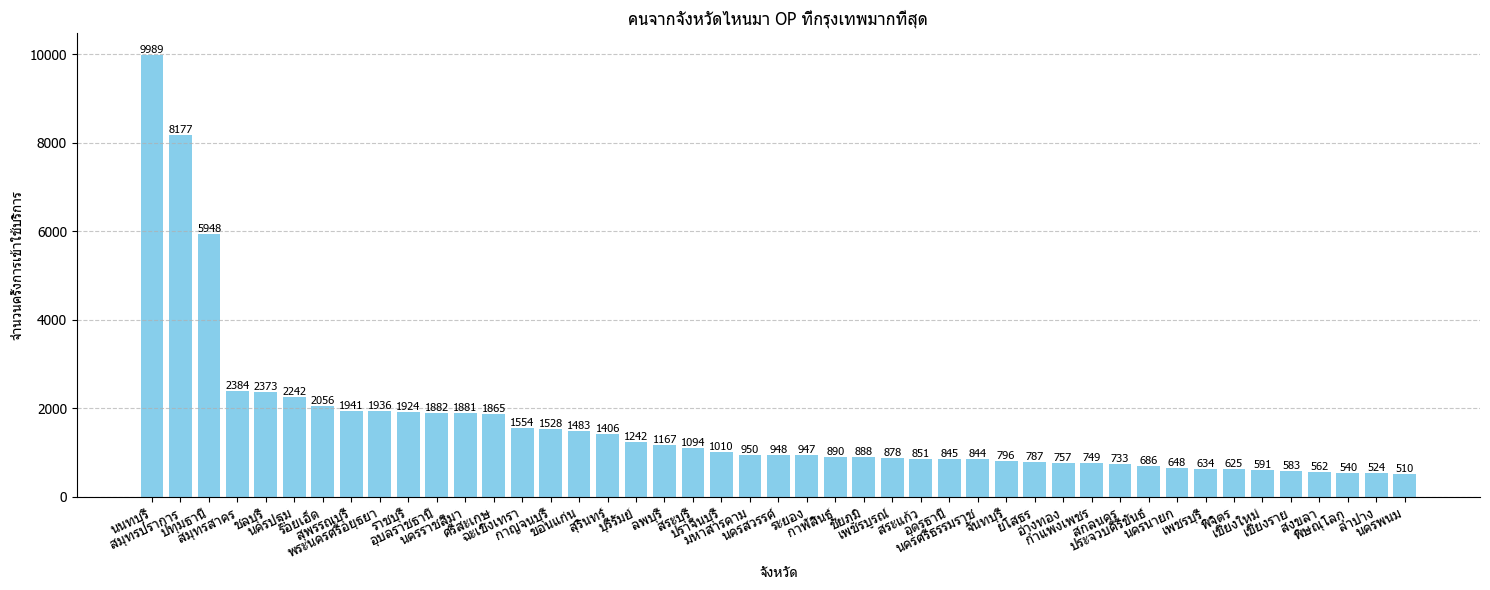

In [84]:
# เรียงข้อมูลจากมากไปน้อยโดยอิงจากคอลัมน์ 'number'
train_df_crosszone2 = train_df_crosszone2.sort_values(by='number', ascending=False)

# เลือกเฉพาะ 20 อันดับแรก
top_20 = train_df_crosszone2.head(45)

plt.figure(figsize=(15, 6))  
plt.bar(top_20 ['province_name'], top_20 ['number'], color='skyblue')  
plt.xlabel('จังหวัด')
plt.ylabel('จำนวนครั้งการเข้าใช้บริการ')
plt.title('คนจากจังหวัดไหนมา OP ที่กรุงเทพมากที่่สุด')

# เพิ่มข้อมูลตัวเลขบนแท่งกราฟ
for index, value in enumerate(top_20 ['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

# เพิ่มกรอบเส้นของกราฟ
plt.gca().spines['top'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().spines['right'].set_visible(False)
plt.xticks(rotation=25, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


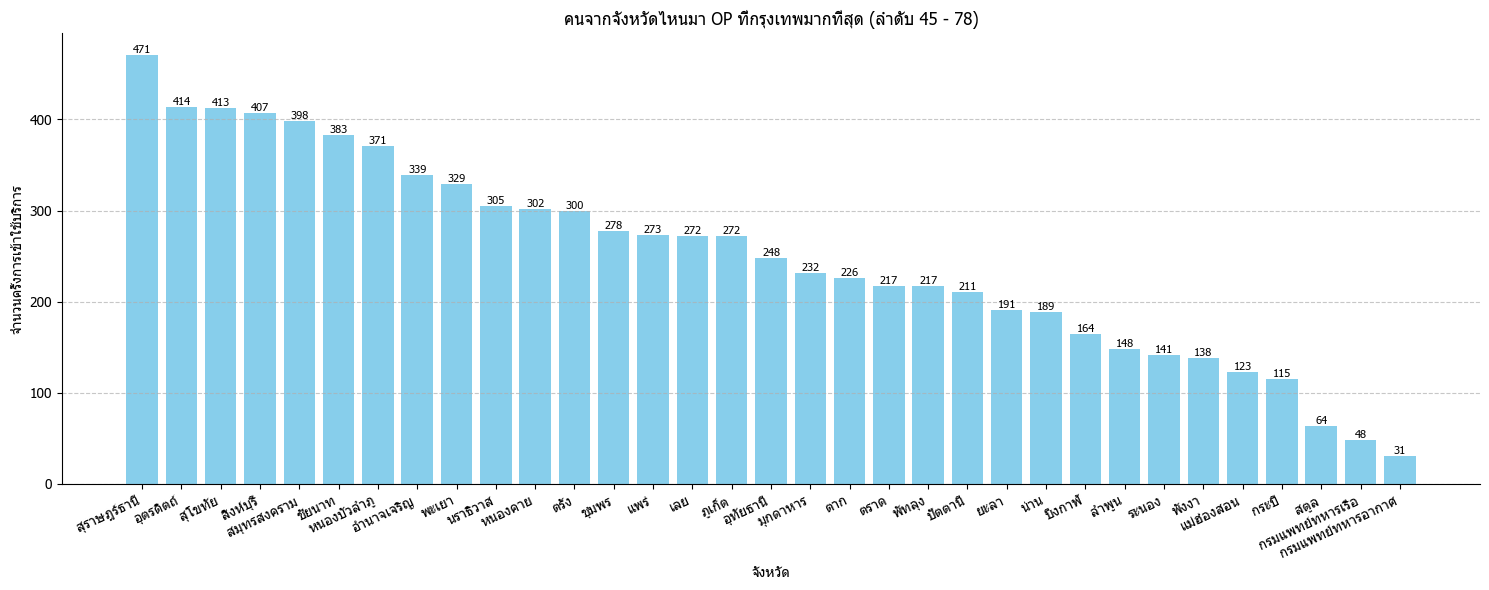

In [85]:

# เรียงข้อมูลจากมากไปน้อยโดยอิงจากคอลัมน์ 'number'
train_df_crosszone2 = train_df_crosszone2.sort_values(by='number', ascending=False)

# เลือกเฉพาะข้อมูลที่อยู่ในลำดับตั้งแต่ 20 ไปถึงสุดท้าย
bottom_20_to_end = train_df_crosszone2.tail(len(train_df_crosszone2) - 45)

plt.figure(figsize=(15, 6))  
plt.bar(bottom_20_to_end['province_name'], bottom_20_to_end['number'], color='skyblue')  
plt.xlabel('จังหวัด')
plt.ylabel('จำนวนครั้งการเข้าใช้บริการ')
plt.title('คนจากจังหวัดไหนมา OP ที่กรุงเทพมากที่่สุด (ลำดับ 45 - 78)')

# เพิ่มข้อมูลตัวเลขบนแท่งกราฟ
for index, value in enumerate(bottom_20_to_end['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

# เพิ่มกรอบเส้นของกราฟ
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=25, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## คนจังหวัดนี้ส่วนนี้ใหญ่ไปเขตไหน 

In [86]:
train_df_crosszone3 = pd.read_csv('CROSS_ZONE_13_NEW3.csv')
sum = train_df_crosszone3['number'].sum() 
sum

81078

In [87]:
filter_rpw = train_df_crosszone3[train_df_crosszone3['number'] > 0]
filter_rpw 

,province_name,ampr_nb,ampr,number
0,กรมแพทย์ทหารอากาศ,30,เขตจตุจักร,2
1,กรมแพทย์ทหารอากาศ,14,เขตพญาไท,1
2,กรมแพทย์ทหารอากาศ,29,เขตบางซื่อ,4
3,กรมแพทย์ทหารอากาศ,36,เขตดอนเมือง,4
4,กรมแพทย์ทหารอากาศ,42,เขตสายไหม,2
...,...,...,...,...
3107,แม่ฮ่องสอน,42,เขตสายไหม,4
3108,แม่ฮ่องสอน,44,เขตสะพานสูง,2
3109,แม่ฮ่องสอน,46,เขตคลองสามวา,1
3110,แม่ฮ่องสอน,49,เขตทุ่งครุ,1


NameError: name 'y_labels' is not defined

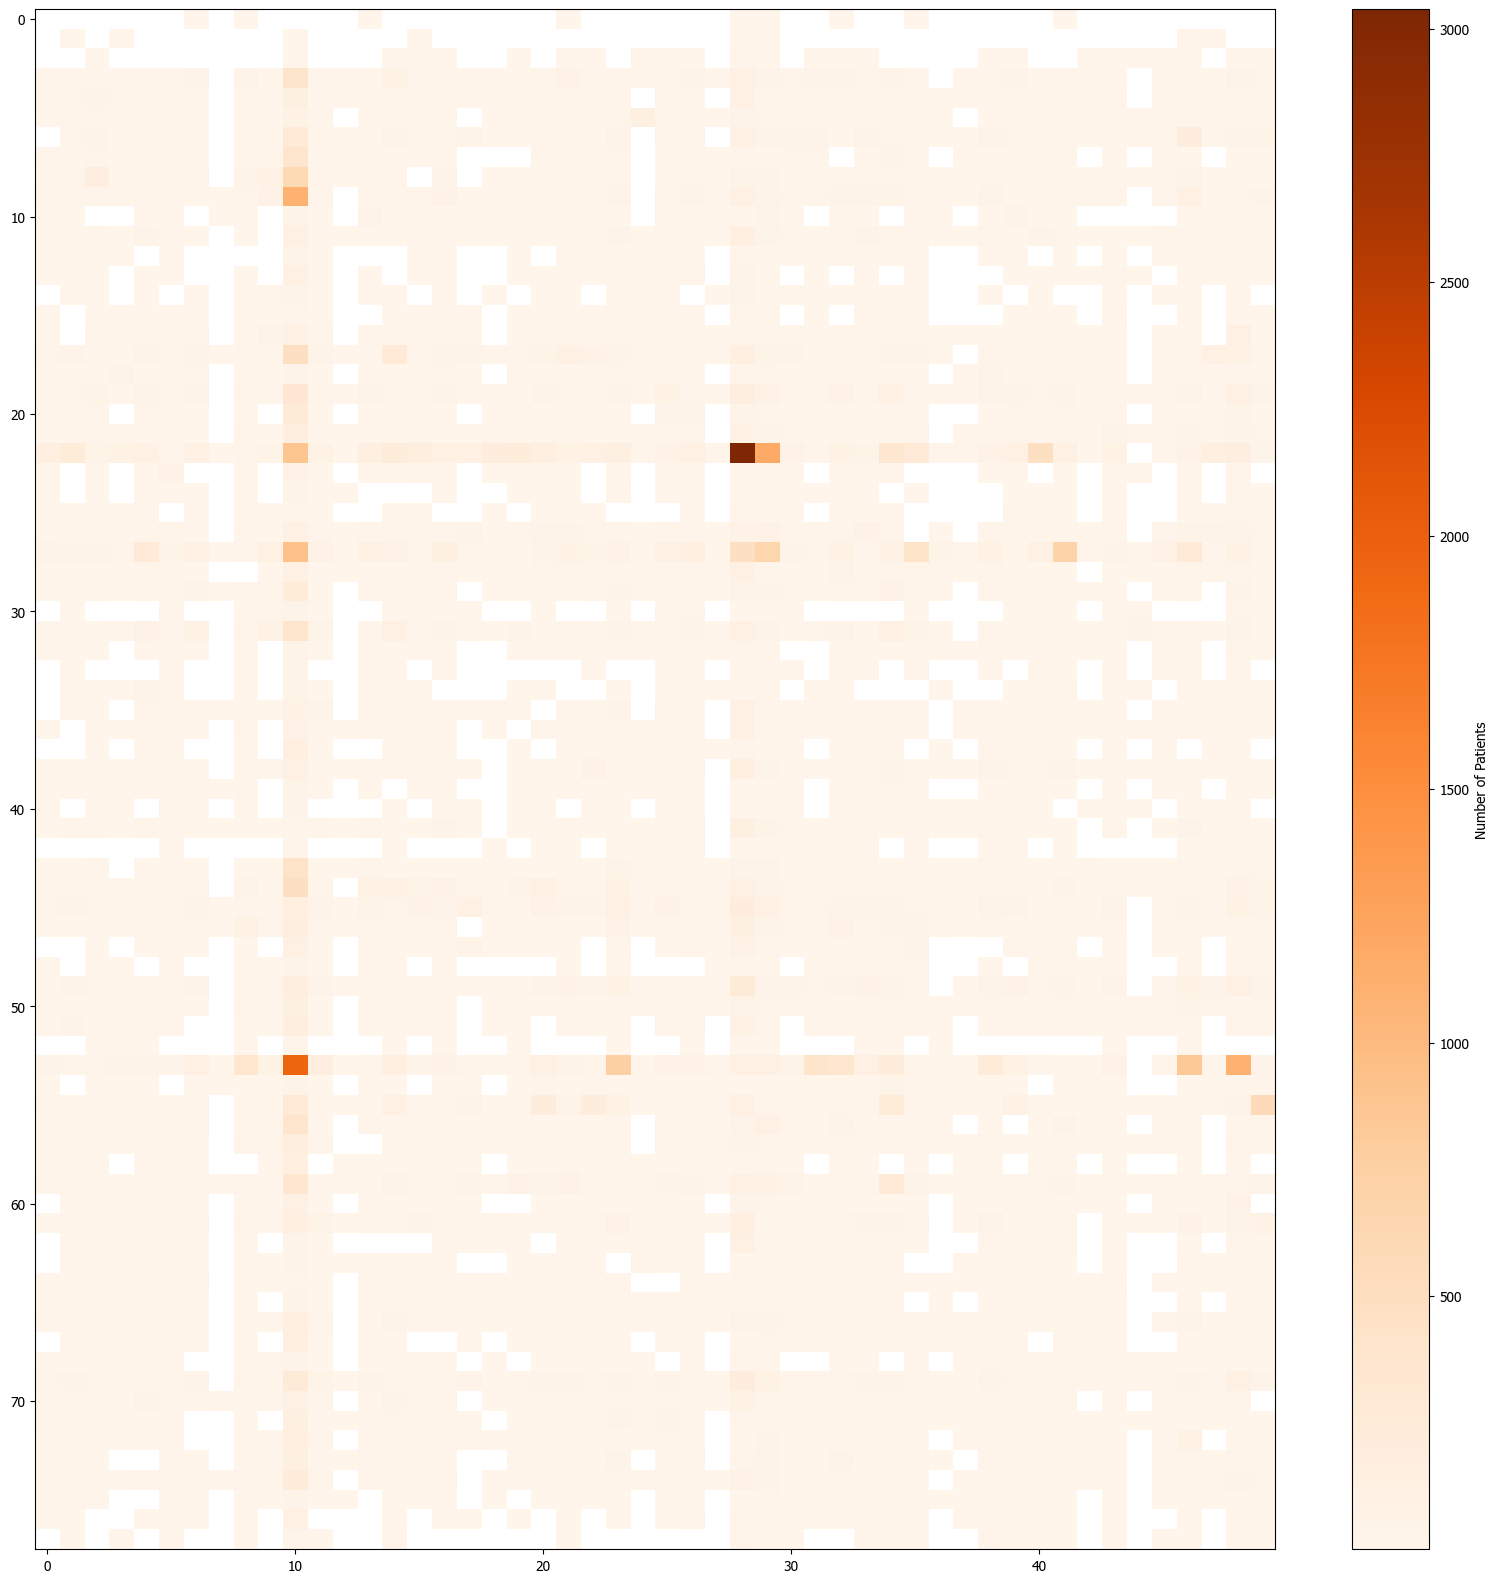

In [88]:
plt.figure(figsize=(20, 20))
heatmap_data = filter_rpw.pivot_table(index='province_name', columns='ampr_nb', values='number', aggfunc='sum')
plt.imshow(heatmap_data, cmap='Oranges', aspect='auto', interpolation='nearest')
plt.colorbar(label='Number of Patients')
plt.yticks(ticks=range(len(y_labels)), labels=y_labels, fontsize=12, rotation=0)
plt.xticks(ticks=range(len(x_labels)), labels=x_labels, fontsize=12, rotation=0)
plt.xlabel('เขตที่ผู้ป่วยเข้าใช้บริการ')
plt.ylabel('เขตประจำของคนไข้')
plt.title('Heatmap of Number of Patients')
plt.grid(False)
plt.show()

In [89]:
#heatmap_data = filter_rpw.pivot_table(index='province_name', columns='ampr_nb', values='number', aggfunc='sum')
#x_labels = heatmap_data.columns
#y_labels = heatmap_data.index
# Create the heatmap
#plt.figure(figsize=(40, 40))
#plt.yticks(ticks=range(len(y_labels)), labels=y_labels, fontsize=24, rotation=0)
#plt.xticks(ticks=range(len(x_labels)), labels=x_labels, fontsize=24, rotation=0)
#sb.heatmap(heatmap_data, annot=True, fmt='d', cmap='Reds')
#plt.xlabel('เขตที่ผู้ป่วยเข้าใช้บริการ')
#plt.ylabel('เขตประจำของคนไข้')
#plt.title('Heatmap: จำนวนผู้ป่วยที่เข้าใช้บริการ (ที่มีจำนวนผู้ป่วย > 50)')
#plt.show()

In [90]:
#crosstab.csv
train_df_crosszone3 = pd.read_csv('CROSS_ZONE_13_NEW3.csv')
crosstab = pd.crosstab(train_df_crosszone3['province_name'], train_df_crosszone3['ampr'], values=train_df_crosszone3['number'], aggfunc='sum')
# เติมค่า 0 ลงในช่องที่มีค่าว่าง
crosstab_filled = crosstab.fillna(0)
crosstab_filled
# ส่งออกตาราง cross-tabulation ที่เติมค่า 0 ลงไปในไฟล์ CSV
crosstab_filled.to_csv('crosstab_output_filled.csv')

In [91]:
filter_rpw_most100 = train_df_crosszone3[train_df_crosszone3['number'] > 0]

## มุมมองที่ 1 : เขตไหนที่คนจากต่างจังหวัดมักจะไปที่สุด
filter_rpw_most100 = filter_rpw_most100.sort_values(by='province_name', ascending=True)
## มุมมองที่ 2 : คนจากจังหวัดไหนไปเขตไหนมากที่สุด
# filter_rpw_most100 = filter_rpw_most100.sort_values(by='province_name', ascending=False)

## ผลลัพธ์
filter_rpw_most100
filter_rpw_most100.to_csv('province_crosstab.csv')

In [92]:
#ลาดกระบัง
#บางซื่อ
#จตุจักร
#ทุ่งคร
#บางนา

In [93]:
#นนทบุรี
#สมุทรสาคร
#ปทุมธานี
#สมุทรปราการ
#ชลบุรี

In [94]:
## คนจังหวัดนี้ส่วนนี้ใหญ่ไปเขตไหน 
## ไปที่โรงพยาบาลไหนมากที่สุด
## province_name , ampr(hcode)

## ข้าม CUP OP ANYWHERE 
zone_hmain = '13'

In [95]:
train_df_crosscup= pd.read_csv('CROSS_CUP_13_NEW.csv')
sum_of_column = train_df_crosscup['number'].sum()
print(train_df_crosscup)
print("ผลรวมทั้งหมดได้" , sum_of_column)

                    ampr  ampr_nb  number
0              เขตพระนคร        1    1777
1               เขตดุสิต        2     542
2             เขตหนองจอก        3    1097
3              เขตบางรัก        4    1031
4             เขตบางกะปิ        6     417
5             เขตปทุมวัน        7     618
6   เขตป้อมปราบศัตรูพ่าย        8      54
7             เขตพระโขนง        9     789
8             เขตมีนบุรี       10    4606
9           เขตลาดกระบัง       11    2527
10            เขตยานนาวา       12    1245
11        เขตสัมพันธวงศ์       13     784
12              เขตพญาไท       14     197
13             เขตธนบุรี       15    2315
14         เขตบางกอกใหญ่       16    1846
15           เขตห้วยขวาง       17     324
16            เขตคลองสาน       18     443
17           เขตตลิ่งชัน       19    2754
18        เขตบางขุนเทียน       21    2943
19          เขตภาษีเจริญ       22    1636
20            เขตหนองแขม       23    5730
21        เขตราษฎร์บูรณะ       24    1669
22            เขตบางพลัด       25 

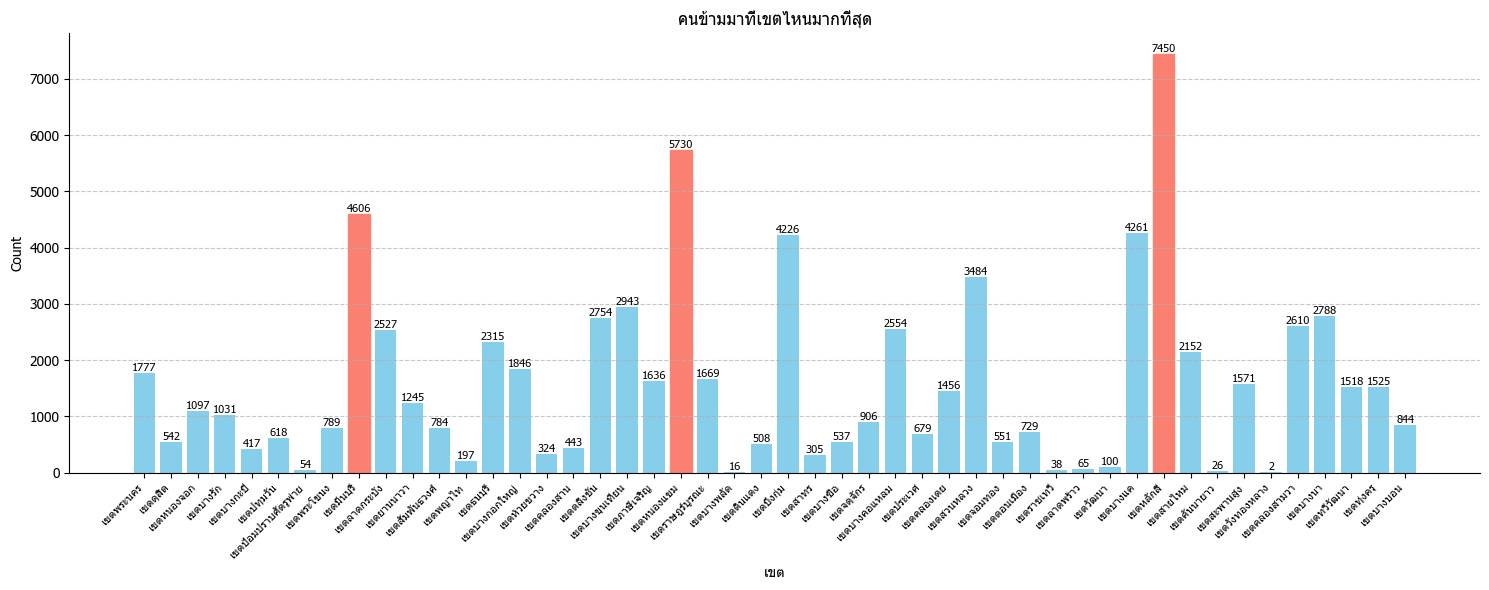

In [96]:
train_df_crosscup = pd.read_csv('CROSS_CUP_13_NEW.csv')

plt.figure(figsize=(15, 6))
bars = plt.bar(train_df_crosscup['ampr'], train_df_crosscup['number'], color='skyblue')

# Highlight the top 3 bars with a different color
top_indices = train_df_crosscup['number'].nlargest(3).index
for i in top_indices:
    bars[i].set_color('salmon')

plt.xlabel('เขต')
plt.ylabel('Count')
plt.title('คนข้ามมาที่เขตไหนมากที่สุด')

for index, value in enumerate(train_df_crosscup['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()




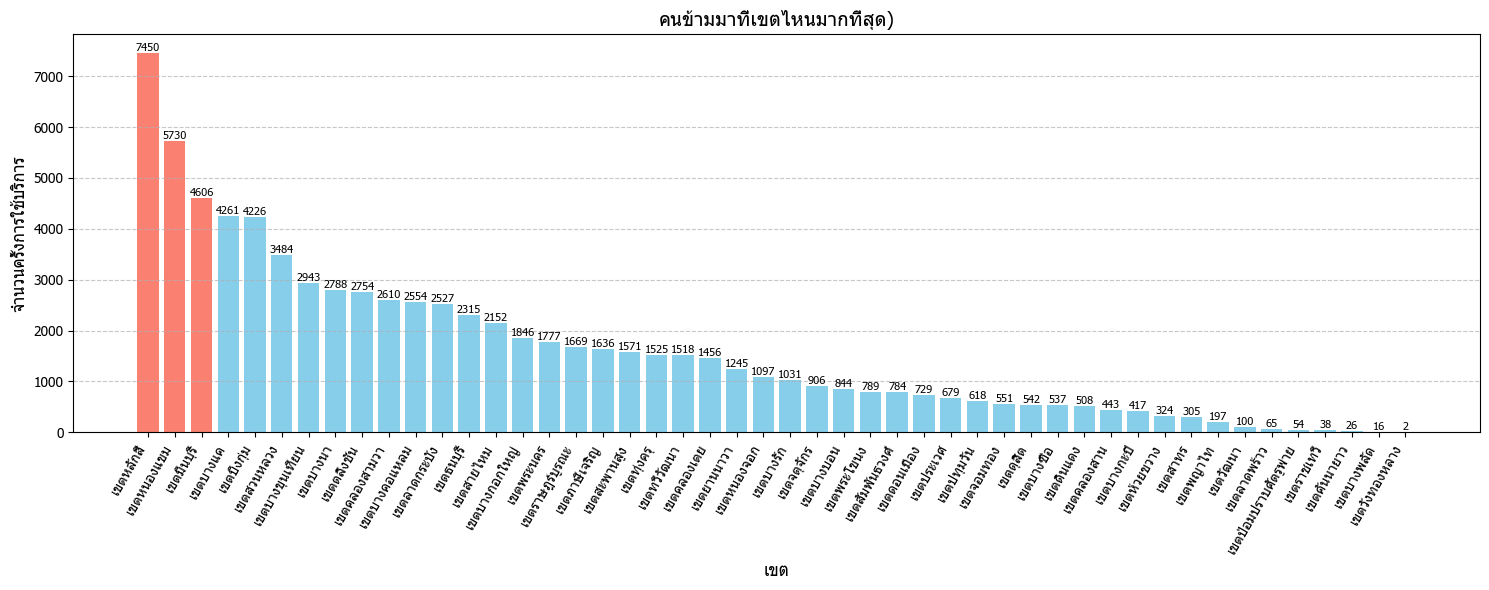

In [97]:
train_df_crosscup = train_df_crosscup.sort_values(by='number', ascending=False)
plt.figure(figsize=(15, 6))

# Plot the bar graph with orange color for the top three districts
bars = plt.bar(train_df_crosscup['ampr'], train_df_crosscup['number'], color=['salmon' if i < 3 else 'skyblue' for i in range(len(train_df_crosscup))])

# Add data labels on top of the bars
for index, value in enumerate(train_df_crosscup['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

plt.xlabel('เขต', fontsize=12)
plt.ylabel('จำนวนครั้งการใช้บริการ', fontsize=12)
plt.title('คนข้ามมาที่เขตไหนมากที่สุด)', fontsize=14)

plt.xticks(rotation=60, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
plt.show()

In [98]:
train_df_crosscup2= pd.read_csv('CROSS_CUP_13_NEW2.csv')
print(train_df_crosscup2)
train_df_crosscup2_sum = train_df_crosscup2['number'].sum()
print("ผลรวมทั้งหมดได้" ,train_df_crosscup2_sum)


    ampr_main_nb  number
0              1       4
1              2      85
2              3    1565
3              4     268
4              5      33
5              6       6
6              7     628
7              8    4791
8              9       2
9             10     227
10            11    1889
11            12      13
12            13       4
13            14      16
14            15     145
15            16       7
16            17     405
17            18   13976
18            19       7
19            20    3071
20            21      42
21            22      29
22            23    3400
23            24     694
24            25       5
25            26       3
26            27      35
27            28      20
28            29       6
29            30    2819
30            31    5696
31            32   10650
32            33     644
33            34     413
34            35     115
35            36    1548
36            37    1156
37            38     795
38            39       4


In [99]:
# คู่ค่า key-value สำหรับแปลงค่าใหม่
hmain_name_mapping = {
    1: 'เขตพระนคร',
    2: 'เขตดุสิต',
    3: 'เขตหนองจอก',
    4: 'เขตบางรัก',
    5: 'เขตบางเขน',
    6: 'เขตบางกะปิ',
    7: 'เขตปทุมวัน',
    8: 'เขตป้อมปราบศัตรูพ่าย',
    9: 'เขตพระโขนง',
    10: 'เขตมีนบุรี',
    11: 'เขตลาดกระบัง',
    12: 'เขตยานนาวา',
    13: 'เขตสัมพันธวงศ์',
    14: 'เขตพญาไท',
    15: 'เขตธนบุรี',
    16: 'เขตบางกอกใหญ่',
    17: 'เขตห้วยขวาง',
    18: 'เขตคลองสาน',
    19: 'เขตตลิ่งชัน',
    20: 'เขตบางกอกน้อย',
    21: 'เขตบางขุนเทียน',
    22: 'เขตภาษีเจริญ',
    23: 'เขตหนองแขม',
    24: 'เขตราษฎร์บูรณะ',
    25: 'เขตบางพลัด',
    26: 'เขตดินแดง',
    27: 'เขตบึงกุ่ม',
    28: 'เขตสาทร',
    29: 'เขตบางซื่อ',
    30: 'เขตจตุจักร',
    31: 'เขตบางคอแหลม',
    32: 'เขตประเวศ',
    33: 'เขตคลองเตย',
    34: 'เขตสวนหลวง',
    35: 'เขตจอมทอง',
    36: 'เขตดอนเมือง',
    37: 'เขตราชเทวี',
    38: 'เขตลาดพร้าว',
    39: 'เขตวัฒนา',
    40: 'เขตบางแค',
    41: 'เขตหลักสี่',
    42: 'เขตสายไหม',
    43: 'เขตคันนายาว',
    44: 'เขตสะพานสูง',
    45: 'เขตวังทองหลาง',
    46: 'เขตคลองสามวา',
    47: 'เขตบางนา',
    48: 'เขตทวีวัฒนา',
    49: 'เขตทุ่งครุ',
    50: 'เขตบางบอน',
    # เพิ่มเขตอื่นๆ ตามลำดับ
}

# ใช้ map() เพื่อแปลงค่าในคอลัมน์ 'hmain' ให้เป็นชื่อเขต
Newcross = train_df_crosscup2['ampr_main_name'] = train_df_crosscup2['ampr_main_nb'].map(hmain_name_mapping) 


In [100]:
train_df_crosscup2['ampr_main_name']

0                เขตพระนคร
1                 เขตดุสิต
2               เขตหนองจอก
3                เขตบางรัก
4                เขตบางเขน
5               เขตบางกะปิ
6               เขตปทุมวัน
7     เขตป้อมปราบศัตรูพ่าย
8               เขตพระโขนง
9               เขตมีนบุรี
10            เขตลาดกระบัง
11              เขตยานนาวา
12          เขตสัมพันธวงศ์
13                เขตพญาไท
14               เขตธนบุรี
15           เขตบางกอกใหญ่
16             เขตห้วยขวาง
17              เขตคลองสาน
18             เขตตลิ่งชัน
19           เขตบางกอกน้อย
20          เขตบางขุนเทียน
21            เขตภาษีเจริญ
22              เขตหนองแขม
23          เขตราษฎร์บูรณะ
24              เขตบางพลัด
25               เขตดินแดง
26              เขตบึงกุ่ม
27                 เขตสาทร
28              เขตบางซื่อ
29              เขตจตุจักร
30            เขตบางคอแหลม
31               เขตประเวศ
32              เขตคลองเตย
33              เขตสวนหลวง
34               เขตจอมทอง
35             เขตดอนเมือง
36              เขตราชเทวี
3

In [101]:
train_df_crosscup2

,ampr_main_nb,number,ampr_main_name
0,1,4,เขตพระนคร
1,2,85,เขตดุสิต
2,3,1565,เขตหนองจอก
3,4,268,เขตบางรัก
4,5,33,เขตบางเขน
5,6,6,เขตบางกะปิ
6,7,628,เขตปทุมวัน
7,8,4791,เขตป้อมปราบศัตรูพ่าย
8,9,2,เขตพระโขนง
9,10,227,เขตมีนบุรี


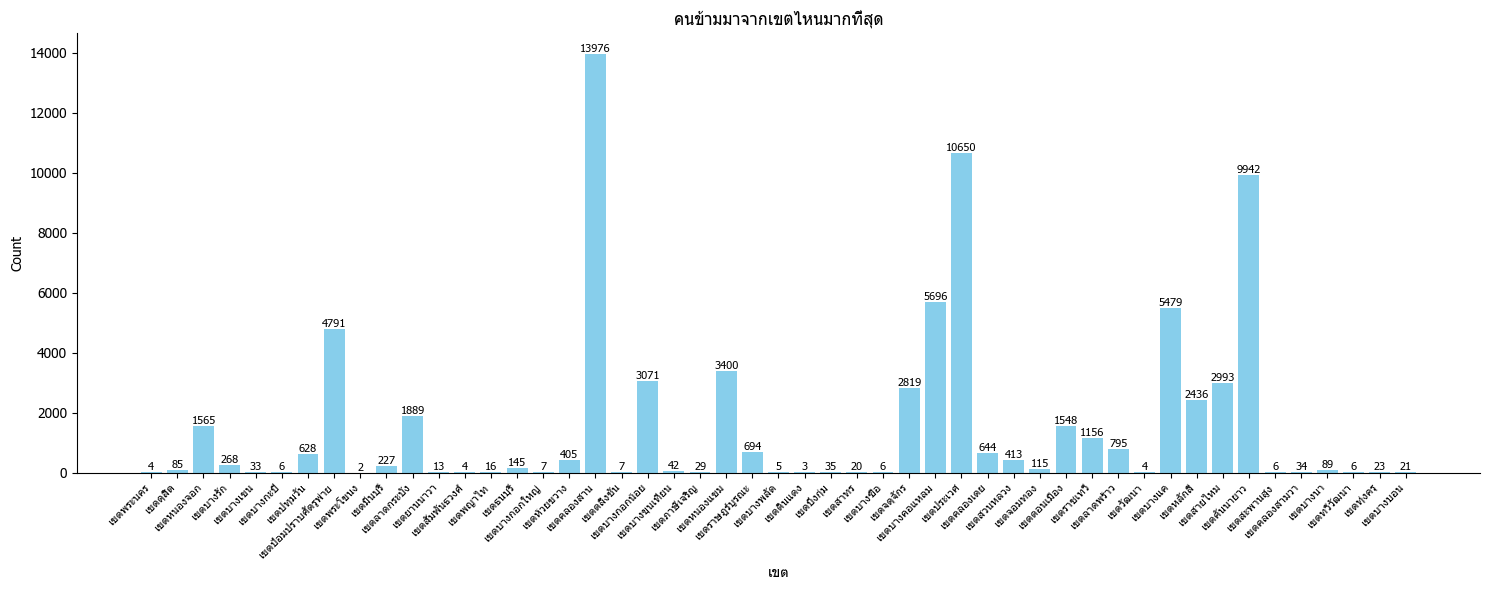

In [102]:
Newcross = train_df_crosscup2['ampr_main_name'] = train_df_crosscup2['ampr_main_nb'].map(hmain_name_mapping) 
plt.figure(figsize=(15, 6))  # ปรับขนาดกราฟให้กว้างขึ้น
plt.bar(train_df_crosscup2['ampr_main_name'], train_df_crosscup2['number'], color='skyblue')  # กำหนดสีให้กับกราฟ
plt.xlabel('เขต')
plt.ylabel('Count')
plt.title('คนข้ามมาจากเขตไหนมากที่สุด')

# เพิ่มข้อมูลตัวเลขบนแท่งกราฟ
for index, value in enumerate(train_df_crosscup2['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

# เพิ่มกรอบเส้นของกราฟ
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

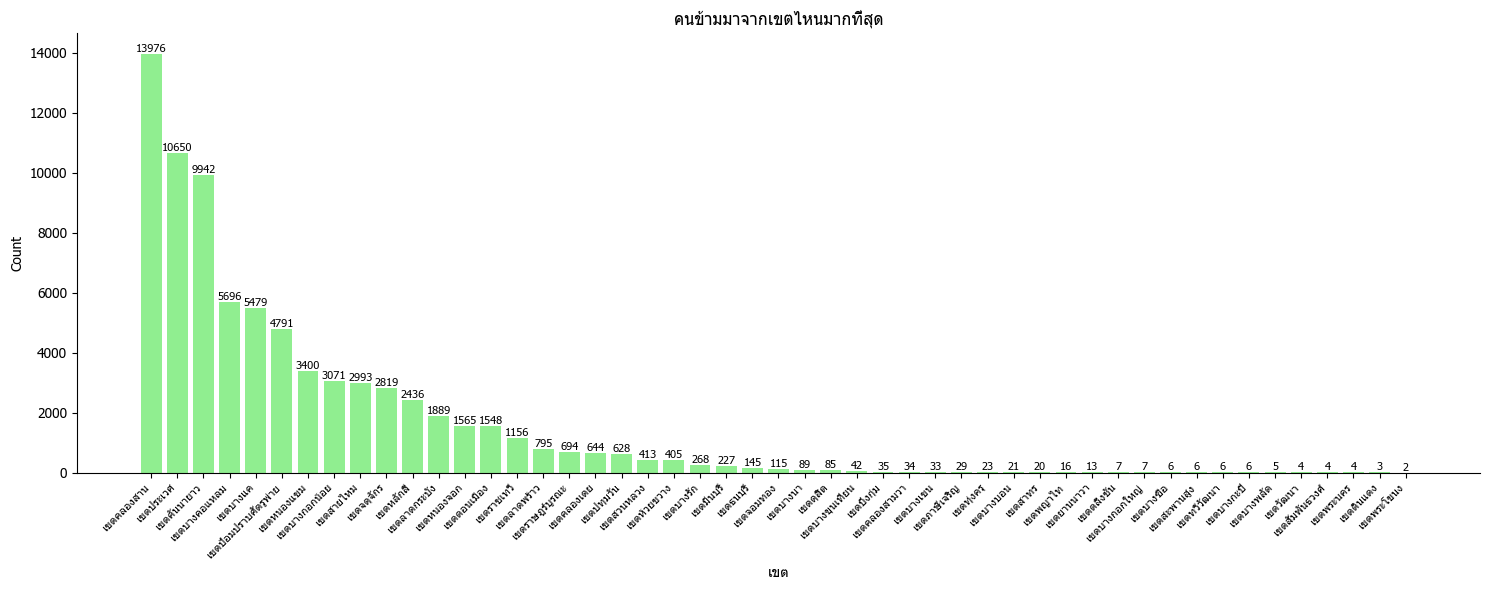

In [103]:
train_df_crosscup2 = train_df_crosscup2.sort_values(by='number', ascending=False)

plt.figure(figsize=(15, 6))  # ปรับขนาดกราฟให้กว้างขึ้น
plt.bar(train_df_crosscup2['ampr_main_name'], train_df_crosscup2['number'], color='lightgreen')  # กำหนดสีให้กับกราฟ
plt.xlabel('เขต')
plt.ylabel('Count')
plt.title('คนข้ามมาจากเขตไหนมากที่สุด')
# เพิ่มข้อมูลตัวเลขบนแท่งกราฟ
for index, value in enumerate(train_df_crosscup2['number']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=8)

# เพิ่มกรอบเส้นของกราฟ
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

In [122]:
## จากเขตไหนไปเขตไหนบ้าง
train_df_crosscup3= pd.read_csv('CROSS_CUP_13_NEW3.csv')
train_df_crosscup3_sum = train_df_crosscup3['number'].sum()
print(train_df_crosscup3)
#train_df_crosscup3.to_csv('output2', index=False)

     number                                    hosname  hcode1  ampr_nb  \
0         2                                    รพ.กลาง   11537        8   
1         2                                    รพ.กลาง   11537        8   
2        12      ศูนย์บริการสาธารณสุข49 วัดชัยพฤกษมาลา   13692       19   
3         1  ศูนย์บริการสาธารณสุข61 สังวาลย์ ทัสนารมย์   13704       42   
4         1          ศูนย์บริการสาธารณสุข11 ประดิพัทธ์   13656       14   
..      ...                                        ...     ...      ...   
704       3                      รพ.สมเด็จพระปิ่นเกล้า   11478       15   
705       6         ศูนย์บริการสาธารณสุข54 ทัศน์เอี่ยม   13697       49   
706       3  ศูนย์บริการสาธารณสุข58 ล้อม-พิมเสนฟักอุดม   13701       24   
707      19                      รพ.สมเด็จพระปิ่นเกล้า   11478       15   
708       2                     คลินิกเวชกรรมบางบอน 19   41974       50   

                amprhcode                                           hnamehos  \
0    เขตป้อมปราบศัต

In [105]:
# คู่ค่า key-value สำหรับแปลงค่าใหม่
hmain_name_mapping = {
    1: 'เขตพระนคร',
    2: 'เขตดุสิต',
    3: 'เขตหนองจอก',
    4: 'เขตบางรัก',
    5: 'เขตบางเขน',
    6: 'เขตบางกะปิ',
    7: 'เขตปทุมวัน',
    8: 'เขตป้อมปราบศัตรูพ่าย',
    9: 'เขตพระโขนง',
    10: 'เขตมีนบุรี',
    11: 'เขตลาดกระบัง',
    12: 'เขตยานนาวา',
    13: 'เขตสัมพันธวงศ์',
    14: 'เขตพญาไท',
    15: 'เขตธนบุรี',
    16: 'เขตบางกอกใหญ่',
    17: 'เขตห้วยขวาง',
    18: 'เขตคลองสาน',
    19: 'เขตตลิ่งชัน',
    20: 'เขตบางกอกน้อย',
    21: 'เขตบางขุนเทียน',
    22: 'เขตภาษีเจริญ',
    23: 'เขตหนองแขม',
    24: 'เขตราษฎร์บูรณะ',
    25: 'เขตบางพลัด',
    26: 'เขตดินแดง',
    27: 'เขตบึงกุ่ม',
    28: 'เขตสาทร',
    29: 'เขตบางซื่อ',
    30: 'เขตจตุจักร',
    31: 'เขตบางคอแหลม',
    32: 'เขตประเวศ',
    33: 'เขตคลองเตย',
    34: 'เขตสวนหลวง',
    35: 'เขตจอมทอง',
    36: 'เขตดอนเมือง',
    37: 'เขตราชเทวี',
    38: 'เขตลาดพร้าว',
    39: 'เขตวัฒนา',
    40: 'เขตบางแค',
    41: 'เขตหลักสี่',
    42: 'เขตสายไหม',
    43: 'เขตคันนายาว',
    44: 'เขตสะพานสูง',
    45: 'เขตวังทองหลาง',
    46: 'เขตคลองสามวา',
    47: 'เขตบางนา',
    48: 'เขตทวีวัฒนา',
    49: 'เขตทุ่งครุ',
    50: 'เขตบางบอน',
    # เพิ่มเขตอื่นๆ ตามลำดับ
}

# ใช้ map() เพื่อแปลงค่าในคอลัมน์ 'hmain' ให้เป็นชื่อเขต
Newcross14 = train_df_crosscup3['ampr_main_name'] = train_df_crosscup3['ampr_main_nb'].map(hmain_name_mapping) 


In [106]:
Newcross14.to_csv('output22', index=False)

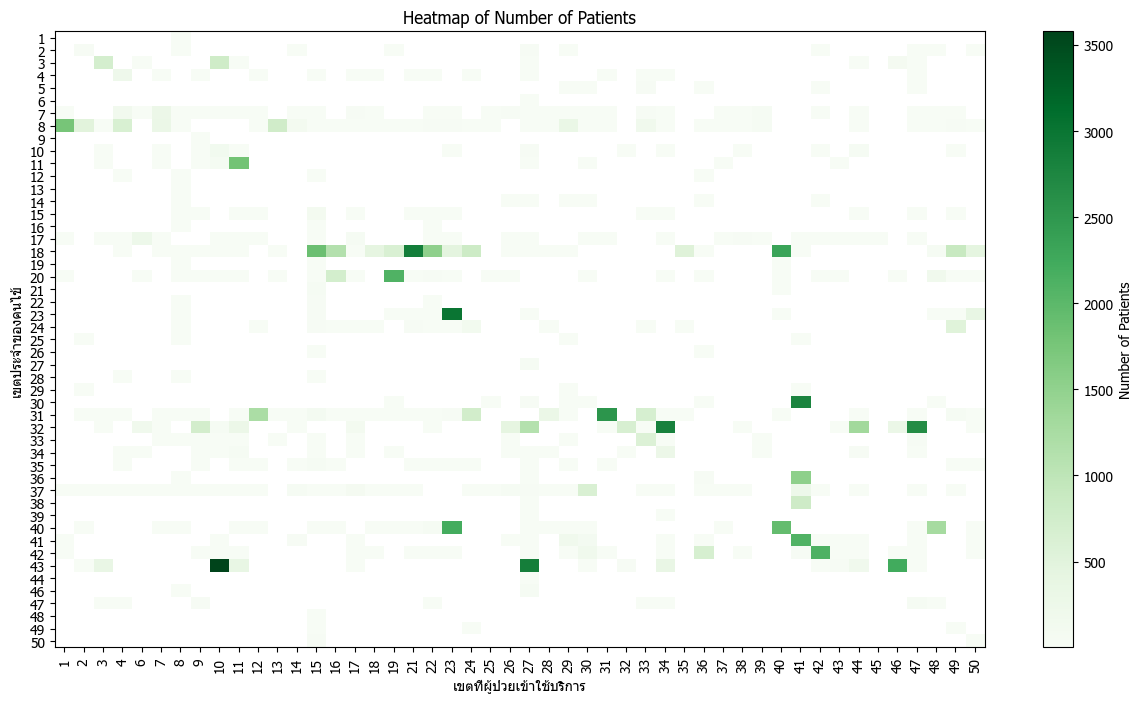

In [108]:
plt.figure(figsize=(15, 8))
heatmap_data = train_df_crosscup3.pivot_table(index='ampr_main_nb', columns='ampr_nb', values='number', aggfunc='sum')
plt.imshow(heatmap_data, cmap='Greens', aspect='auto', interpolation='nearest')
plt.colorbar(label='Number of Patients')
plt.xticks(np.arange(len(heatmap_data.columns)), heatmap_data.columns, rotation=90)
plt.yticks(np.arange(len(heatmap_data.index)), heatmap_data.index)
plt.xlabel('เขตที่ผู้ป่วยเข้าใช้บริการ')
plt.ylabel('เขตประจำของคนไข้')
plt.title('Heatmap of Number of Patients')
plt.grid(False)
plt.show()


In [116]:

crosstab = pd.crosstab(train_df_crosscup3['ampr_main_nb'], train_df_crosscup3['ampr_nb'], values=train_df_crosscup3['number'], aggfunc='sum')
# เติมค่า 0 ลงในช่องที่มีค่าว่าง
crosstab_filled = crosstab.fillna(0)
crosstab_filled


ampr_nb,1,2,3,4,6,7,8,9,10,11,...,41,42,43,44,45,46,47,48,49,50
ampr_main_nb,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,23.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,0.0,1.0
3,0.0,0.0,699.0,0.0,1.0,0.0,0.0,0.0,771.0,3.0,...,0.0,0.0,0.0,2.0,0.0,79.0,6.0,0.0,0.0,0.0
4,0.0,0.0,0.0,213.0,0.0,9.0,0.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.0,0.0,0.0,142.0,2.0,278.0,3.0,11.0,3.0,5.0,...,0.0,2.0,0.0,9.0,0.0,0.0,5.0,10.0,6.0,0.0
8,1761.0,492.0,2.0,642.0,0.0,302.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,12.0,2.0,24.0,10.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
train_df_crosscup3
filter_rpw_most100s = train_df_crosscup3[train_df_crosscup3['number'] > 100]
filter_rpw_most100s 
filter_rpw_most100s.to_csv('output2022', index=False)

แยกตำบลที่ไม่รู้จะพล็อตยังไงดี

In [109]:
train_df_crosscup4 = pd.read_csv('CROSS_CUP_13_NEW4.csv')
selected_rows = train_df_crosscup4[train_df_crosscup4['number'] > 100]
selected_rows

,number,ampr_nb,tumbon_nb,ampr_main_nb,tumbon_main_nb
0,208,1,2,8,2
5,1553,1,10,8,2
10,490,2,4,8,2
20,699,3,7,3,1
30,344,3,7,43,1
...,...,...,...,...,...
619,528,49,2,24,2
625,136,49,1,18,2
629,738,49,2,18,2
635,364,50,1,23,2


In [110]:
## ไปที่โรงพยาบาลไหนมากที่สุด
## หน่วยบริการประเภทไหน
## ระยะเวลา dateadm
## โรคที่มาใช้บริการ

In [111]:
v_t_eis_opanyw_hosmap_join 

,sex,age,hcode_opanwhere,hcode_hosmap,htype,htype_use,prov1,zone_hcode,hmain2,prov2,...,ampr,tumbon,nhso_zone,nhso_zonename,province_nb,ampr_nb,tumbon_nb,year,month,day
0,2,57,13691,13691,12,อื่นๆ,1000,13,14641,1000,...,เขตหนองแขม,หนองแขม,13,เขต 13 กรุงเทพมหานคร,10,23,2,2565,8,16
1,1,65,13678,13678,12,อื่นๆ,1000,13,11539,1000,...,เขตบางกอกใหญ่,วัดอรุณ,13,เขต 13 กรุงเทพมหานคร,10,16,1,2565,8,9
2,2,0,43189,43189,13,คลินิก(เอกชน),1000,13,10876,3000,...,เขตบางซื่อ,บางซื่อ,13,เขต 13 กรุงเทพมหานคร,10,29,1,2565,12,7
3,1,1,13649,13649,12,อื่นๆ,1000,13,10925,3200,...,เขตดินแดง,ดินแดง,13,เขต 13 กรุงเทพมหานคร,10,26,1,2565,11,23
4,2,56,13688,13688,12,อื่นๆ,1000,13,11470,1000,...,เขตมีนบุรี,มีนบุรี,13,เขต 13 กรุงเทพมหานคร,10,10,1,2565,7,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165561,1,44,43695,43695,13,คลินิก(เอกชน),1000,13,21430,1200,...,เขตหลักสี่,ทุ่งสองห้อง,13,เขต 13 กรุงเทพมหานคร,10,41,1,2566,4,3
165562,1,79,42815,42815,13,คลินิก(เอกชน),1000,13,11305,7400,...,เขตจอมทอง,บางค้อ,13,เขต 13 กรุงเทพมหานคร,10,35,2,2566,6,3
165563,2,80,43898,43898,13,คลินิก(เอกชน),1000,13,11070,4500,...,เขตคลองเตย,คลองเตย,13,เขต 13 กรุงเทพมหานคร,10,33,1,2566,2,13
165564,2,49,43694,43694,13,คลินิก(เอกชน),1000,13,41613,1200,...,เขตบางซื่อ,วงศ์สว่าง,13,เขต 13 กรุงเทพมหานคร,10,29,2,2566,3,13
